## Movie Review Sentiment Analysis

You will use the IMDB movie reviews dataset to classify reviews as 'positive' or 'negative'. We have divided the data into training and test sets. 
The training set contains 800 positive and 800 negative movie reviews whereas the test set contains 200 positive and 200  negative movie reviews.

 

This was one of the first widely-available sentiment analysis datasets compiled by Pang and Lee's. The data was first collected in 2002, however, the text is similar to movies reviews you find on IMDB today. The dataset is in a CSV format. It has two categories: Pos (reviews that express a positive or favourable sentiment) and Neg (reviews that express a negative or unfavourable sentiment). For this exercise, we will assume that all reviews are either positive or negative; there are no neutral reviews.


In [212]:
import numpy as np
import pandas as pd


In [213]:
# reading the training data
movie_df = pd.read_csv('movie_review_train.csv')
movie_df.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [214]:
# number of rows
len(movie_df)

1600

In [215]:
movie_df.shape

(1600, 2)

In [216]:
movie_df['class'].value_counts()

Pos    800
Neg    800
Name: class, dtype: int64

### mapping labels to 0 and 1

Mapping "Neg" to 0 and "Pos" to 1

In [217]:
movie_df['label'] = movie_df['class'].map({'Neg':0, 'Pos':1})

In [218]:
movie_df.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


### we can now drop the column 'class'

In [219]:
movie_df = movie_df.drop('class', axis=1)
movie_df.head()

,text,label
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1


In [220]:
# convert to X and y
X = movie_df['text']
y = movie_df['label']
print(X.shape)
print(y.shape)

(1600,)
(1600,)


### splitting into test and train

In [221]:
from sklearn.model_selection  import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [223]:
X_train.head()

1145     this movie about two dysfunctional families n...
73       felix   sami bouajila     the siege     lives...
446      vampire lore and legend has always been a pop...
399      kevin smith is like a big kid    his humor is...
647      bruce lee was a bigger than life martial arti...
Name: text, dtype: object

In [224]:
y_train.head()

1145    0
73      1
446     1
399     1
647     1
Name: label, dtype: int64

### vectorizing the sentences; removing stop words

In [225]:
from sklearn.feature_extraction.text import CountVectorizer

In [226]:
# vect = CountVectorizer(stop_words='english')
vect = CountVectorizer(stop_words='english',min_df=.03,max_df=.8)

In [227]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=None, min_df=0.03,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [228]:
# printing the vocabulary
vect.vocabulary_

{'movie': 940,
 'really': 1149,
 'gets': 608,
 'ground': 633,
 'despite': 360,
 'good': 622,
 'performances': 1031,
 'basically': 116,
 'cast': 199,
 'eddie': 428,
 'sean': 1236,
 'robin': 1195,
 'married': 880,
 'couple': 295,
 'luck': 862,
 'living': 840,
 'city': 235,
 'spend': 1329,
 'little': 837,
 'local': 842,
 'best': 130,
 'friend': 586,
 'wife': 1575,
 'share': 1268,
 'odd': 982,
 'relationship': 1160,
 'return': 1179,
 'world': 1604,
 'love': 856,
 'soon': 1313,
 'lead': 807,
 'new': 965,
 'like': 827,
 'high': 673,
 'reach': 1139,
 'wants': 1548,
 'baby': 108,
 'father': 518,
 'deep': 349,
 'sense': 1250,
 'leaves': 814,
 'badly': 111,
 'fear': 522,
 'lies': 823,
 'happens': 650,
 'come': 250,
 'result': 1177,
 'inevitable': 728,
 'ends': 447,
 'believes': 128,
 'months': 933,
 'reality': 1145,
 '10': 1,
 'years': 1619,
 'decade': 343,
 'solid': 1308,
 'individual': 726,
 'small': 1300,
 'role': 1198,
 'life': 824,
 'falls': 503,
 'apart': 67,
 'released': 1164,
 'comes': 2

In [229]:
# vocab size
len(vect.vocabulary_.keys())

1624

### transforming the train and test datasets

In [230]:
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [231]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1
  (0, 67)	1
  (0, 108)	1
  (0, 111)	1
  (0, 116)	1
  (0, 128)	1
  (0, 130)	1
  (0, 168)	1
  (0, 199)	1
  (0, 226)	1
  (0, 235)	1
  (0, 250)	1
  (0, 254)	1
  (0, 286)	1
  (0, 295)	1
  (0, 332)	1
  (0, 343)	1
  (0, 349)	1
  (0, 360)	1
  (0, 428)	14
  (0, 447)	1
  (0, 503)	1
  (0, 518)	2
  (0, 522)	1
  (0, 586)	1
  :	:
  (1199, 1103)	1
  (1199, 1115)	1
  (1199, 1160)	1
  (1199, 1161)	1
  (1199, 1176)	1
  (1199, 1199)	1
  (1199, 1229)	1
  (1199, 1245)	1
  (1199, 1264)	1
  (1199, 1300)	1
  (1199, 1313)	2
  (1199, 1361)	1
  (1199, 1378)	3
  (1199, 1410)	1
  (1199, 1420)	1
  (1199, 1444)	1
  (1199, 1448)	1
  (1199, 1457)	1
  (1199, 1485)	1
  (1199, 1487)	1
  (1199, 1520)	1
  (1199, 1562)	1
  (1199, 1586)	1
  (1199, 1604)	2
  (1199, 1618)	1


## 2. Building and Evaluating the Model

In [232]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB

In [233]:
# Creating Object
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)


In [234]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [235]:
# X_TRAIN_Full = movie_df['text']
# y_TRAIN_Full = movie_df['label']

# vect_full = CountVectorizer(stop_words='english',min_df=.03,max_df=.8)
# vect_full.fit(X_TRAIN_Full)

# X_train_full_transformed = vect_full.transform(X_TRAIN_Full)

# mnb.fit(X_train_full_transformed, y_TRAIN_Full)

# y_pred_full_class = mnb.predict(X_train_full_transformed)
# y_pred_full_proba = mnb.predict_proba(X_train_full_transformed)

# metrics.accuracy_score(y_TRAIN_Full, y_pred_full_class)

# confusion = metrics.confusion_matrix(y_TRAIN_Full, y_pred_full_class)
# print(confusion)




### Model Evaluation on train set

In [236]:
# printing the overall accuracy
from sklearn import metrics

In [237]:
metrics.accuracy_score(y_test, y_pred_class)

0.8225

In [238]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

[[165  39]
 [ 32 164]]


In [239]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [240]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8367346938775511


In [241]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.8088235294117647


In [242]:
precision = TP / float(TP + FP)
print("precision",precision)

precision 0.8078817733990148


In [243]:
print("precision score", metrics.precision_score(y_test, y_pred_class))

precision score 0.8078817733990148


In [244]:
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))

RECALL SCORE : 0.8367346938775511


In [245]:
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

F1 SCORE : 0.8220551378446116


In [246]:
y_pred_class

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [247]:
y_pred_proba

array([[3.64259165e-06, 9.99996357e-01],
       [9.99753708e-01, 2.46292025e-04],
       [3.64159049e-03, 9.96358410e-01],
       [4.13234549e-02, 9.58676545e-01],
       [9.91755193e-01, 8.24480704e-03],
       [9.95171156e-01, 4.82884427e-03],
       [9.99997292e-01, 2.70794460e-06],
       [6.01940052e-01, 3.98059948e-01],
       [6.37676652e-03, 9.93623233e-01],
       [5.56095377e-04, 9.99443905e-01],
       [9.99996233e-01, 3.76689411e-06],
       [9.43142212e-10, 9.99999999e-01],
       [9.99999988e-01, 1.22783093e-08],
       [1.00000000e+00, 1.61111459e-27],
       [1.52364697e-01, 8.47635303e-01],
       [9.73179860e-01, 2.68201404e-02],
       [9.99999684e-01, 3.16063838e-07],
       [9.78458312e-01, 2.15416882e-02],
       [9.90920704e-01, 9.07929565e-03],
       [1.22765625e-12, 1.00000000e+00],
       [1.13417839e-06, 9.99998866e-01],
       [1.62126513e-02, 9.83787349e-01],
       [5.79727657e-02, 9.42027234e-01],
       [9.99998951e-01, 1.04869133e-06],
       [3.304625

### creating an ROC curve

In [248]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [249]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

### area under the curve

In [250]:
print (roc_auc)

0.8942201880752301


In [251]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.035714,0.004902
2,1.000000e+00,0.051020,0.004902
3,1.000000e+00,0.061224,0.004902
4,1.000000e+00,0.209184,0.004902
...,...,...,...
103,2.412374e-08,0.989796,0.794118
104,2.091942e-08,0.994898,0.794118
105,1.358206e-16,0.994898,0.980392
106,5.585029e-17,1.000000,0.980392


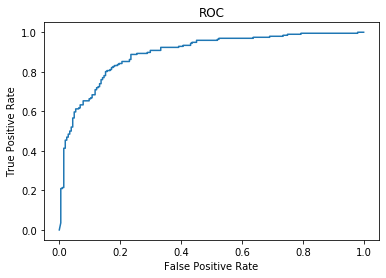

In [252]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

## Model Evaluation on Test set

In [253]:
# reading the test data
movie_test_df = pd.read_csv('movie_review_test.csv')
movie_test_df.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [254]:
movie_test_df.shape

(400, 2)

In [255]:
movie_test_df['class'].value_counts()

Pos    200
Neg    200
Name: class, dtype: int64

### mapping labels to 0 and 1
Mapping "Neg" to 0 and "Pos" to 1

In [256]:
movie_test_df['label'] = movie_test_df['class'].map({'Neg':0, 'Pos':1})

In [257]:
# dropping class column
movie_test_df = movie_test_df.drop('class', axis=1)
movie_test_df.head()

,text,label
0,films adapted from comic books have had plent...,1
1,every now and then a movie comes along from a...,1
2,you ve got mail works alot better than it des...,1
3,jaws is a rare film that grabs your atte...,1
4,moviemaking is a lot like being the general m...,1


In [258]:
# # convert to numpy array
# test_numpy_array = movie_test_df.values

# # split into X and y
# X_TEST = test_numpy_array[:,0]
# y_TEST = test_numpy_array[:,1]
# # print(X_TEST)
# print(y_TEST)

X_TEST = movie_test_df['text']
y_TEST = movie_test_df['label']

In [259]:
# transform the test data
# note that you *never* fit on test data, only on training data
# and only transform the test data
X_TEST_transformed = vect.transform(X_TEST)

In [260]:
# # convert to non-sparse array
# X_test=X_test_transformed.toarray()
# X_test

In [261]:
# predict class
y_PRED_class = mnb.predict(X_TEST_transformed)

# predict probabilities
y_PRED_proba = mnb.predict_proba(X_TEST_transformed)

In [262]:
metrics.accuracy_score(y_TEST, y_PRED_class)

0.815

In [263]:
confusion = metrics.confusion_matrix(y_TEST, y_PRED_class)
print(confusion)

[[170  30]
 [ 44 156]]


In [264]:
TN_TEST = confusion[0, 0]
FP_TEST = confusion[0, 1]
FN_TEST = confusion[1, 0]
TP_TEST = confusion[1, 1]

In [265]:
sensitivity_TEST = TP_TEST / float(FN_TEST + TP_TEST)
print("TEST sensitivity",sensitivity_TEST)

specificity_TEST = TN_TEST / float(TN_TEST + FP_TEST)
print("TEST specificity",specificity_TEST)

precision_TEST = TP_TEST / float(TP_TEST + FP_TEST)
print("TEST precision",precision_TEST)

print("TEST precision score", metrics.precision_score(y_TEST, y_PRED_class))

print("TEST RECALL SCORE :", metrics.recall_score(y_TEST, y_PRED_class))

print("TEST F1 SCORE :",metrics.f1_score(y_TEST, y_PRED_class))

TEST sensitivity 0.78
TEST specificity 0.85
TEST precision 0.8387096774193549
TEST precision score 0.8387096774193549
TEST RECALL SCORE : 0.78
TEST F1 SCORE : 0.8082901554404146


In [266]:
false_positive_rate_TEST, true_positive_rate_TEST, thresholds_TEST = roc_curve(y_TEST, y_PRED_proba[:,1])
roc_auc_TEST = auc(false_positive_rate_TEST, true_positive_rate_TEST)

In [267]:
print (roc_auc_TEST)

0.8813249999999999


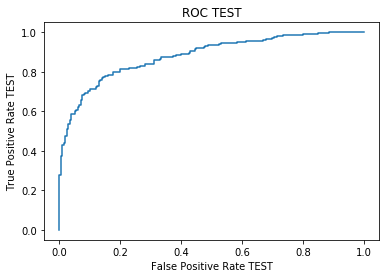

In [268]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate TEST')
plt.xlabel('False Positive Rate TEST')
plt.title('ROC TEST')
plt.plot(false_positive_rate_TEST, true_positive_rate_TEST)

##### QUES 1:

What is the size of vocabulary after removing the stop words? Note that the vocabulary size depends only on the training set.

In [269]:
vect_que1 = CountVectorizer(stop_words='english')
vect_que1.fit(movie_df['text'])
len(vect_que1.vocabulary_.keys())

35858

##### QUES 2:

Suppose we don't want to consider those (rare) words which have appeared only in 3% of the documents, or say those (extremely common ones) which have appeared in 80% of the documents.

Use CountVectorizer(stop_words='english', min_df=.03, max_df=.8) to create a new vocabulary from the training set. What is the size of the new vocabulary?

In [270]:
vect_que2 = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)
vect_que2.fit(movie_df['text'])
len(vect_que2.vocabulary_.keys())

1643

#### QUES 3:

Suppose we build the vocabulary from the training data using CountVectorizer(stop_words='english', min_df=.03, max_df=.8) and then transform the test data using CountVectorizer(). How many nonzero entries are there in the sparse matrix (corresponding to the test data)? 

In [271]:
vect3 = CountVectorizer(stop_words='english',min_df=.03,max_df=.8)
vect3.fit(movie_df['text'])
X3_test_fv = vect3.transform(movie_test_df['text'])
X3_test_fv

<400x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 51663 stored elements in Compressed Sparse Row format>

## Bernoulli Naive Bayes model

In [272]:
# train data
X_B_train = movie_df["text"]
y_B_train = movie_df["label"]

In [273]:
# test data
X_B_test = movie_test_df["text"]
y_B_test = movie_test_df["label"]

In [274]:
vect_B = CountVectorizer(stop_words='english',min_df=.03,max_df=.8)


vect_B.fit(X_B_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=None, min_df=0.03,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [275]:
vect_B.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [276]:
# transform
X_train_B_transformed = vect_B.transform(X_B_train)
X_test_B_tranformed =vect_B.transform(X_B_test)

In [277]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_B_transformed, y_B_train)

# predict class
y_B_pred_class = bnb.predict(X_test_B_tranformed)

# predict probability
y_B_pred_proba = bnb.predict_proba(X_test_B_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_B_test, y_B_pred_class)

0.79

In [278]:
confusion = metrics.confusion_matrix(y_B_test, y_B_pred_class)
confusion

array([[177,  23],
       [ 61, 139]])

In [279]:
#[row, column]
TN_B = confusion[0, 0]
FP_B = confusion[0, 1]
FN_B = confusion[1, 0]
TP_B = confusion[1, 1]

In [280]:
sensitivity = TP_B / float(FN_B + TP_B)
print("sensitivity",sensitivity)

specificity = TN_B / float(TN_B + FP_B)
print("specificity",specificity)

precision = TP_B / float(TP_B + FP_B)
print("precision",precision)

print("precision score", metrics.precision_score(y_B_test, y_B_pred_class))

print("RECALL SCORE :", metrics.recall_score(y_B_test, y_B_pred_class))
print("F1 SCORE :",metrics.f1_score(y_B_test, y_B_pred_class))

accuracy = (TP_B + TN_B)/float(TP_B + TN_B + FN_B + FP_B)
print("accuracy ", accuracy)

sensitivity 0.695
specificity 0.885
precision 0.8580246913580247
precision score 0.8580246913580247
RECALL SCORE : 0.695
F1 SCORE : 0.7679558011049723
accuracy  0.79


In [281]:
false_positive_rate_B, true_positive_rate_B, thresholds_B = roc_curve(y_B_test, y_B_pred_class)
roc_auc_B = auc(false_positive_rate_B, true_positive_rate_B)

In [282]:
print (roc_auc_B)

0.7899999999999999


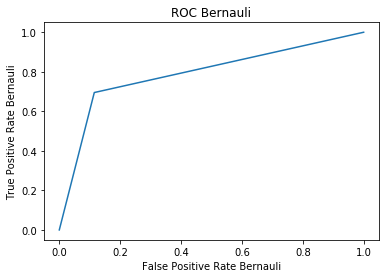

In [283]:
%matplotlib inline  
plt.ylabel('True Positive Rate Bernauli')
plt.xlabel('False Positive Rate Bernauli')
plt.title('ROC Bernauli')
plt.plot(false_positive_rate_B, true_positive_rate_B)